# Merck - Molecular Activity

### Goal 
The challenge is to predict the activity value for each molecule/data set combination in the test set. To keep predictions for molecules unique to each data set, a data set identifier has been prepended to each molecule ID (e.g., "ACT1_" or "ACT8_").

### Data
The Training and Test Sets each consist of 15 biological activity data sets in comma separated value (CSV) format.
 Each row of data corresponds to a chemical structure represented by molecular descriptorses

The training files are of theform

Column 1: Mole  cule ID
Column 2: Activity. Note that these are raw activity values and different data sets can have activity measured in differen  t units.
Column 3-end: Molecular descriptors  /features
The test files are in the same format with Column 2 removed.

Molecule IDs and descriptor names are global to all data sets. Thus some molecules will appear in multiple data sets, as will some " or "ACT8_").

In [1]:
#import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

################################################
15
(5059, 5554)
Removing features with zero variance
(5059, 5283)
Removing feature with less then 0.1 correlation
(5059, 544)
Clustering with TSNE
################################################
14
(4165, 5947)
Removing features with zero variance
(4165, 5715)
Removing feature with less then 0.1 correlation
(4165, 376)
Clustering with TSNE
################################################
13
(6105, 5700)
Removing features with zero variance
(6105, 5526)
Removing feature with less then 0.1 correlation
(6105, 125)
Clustering with TSNE
################################################
12
(8651, 5472)
Removing features with zero variance
(8651, 4992)
Removing feature with less then 0.1 correlation
(8651, 147)
Clustering with TSNE
################################################
11
(6399, 5137)
Removing features with zero variance
(6399, 4732)
Removing feature with less then 0.1 correlation
(6399, 495)
Clustering with TSNE
####################

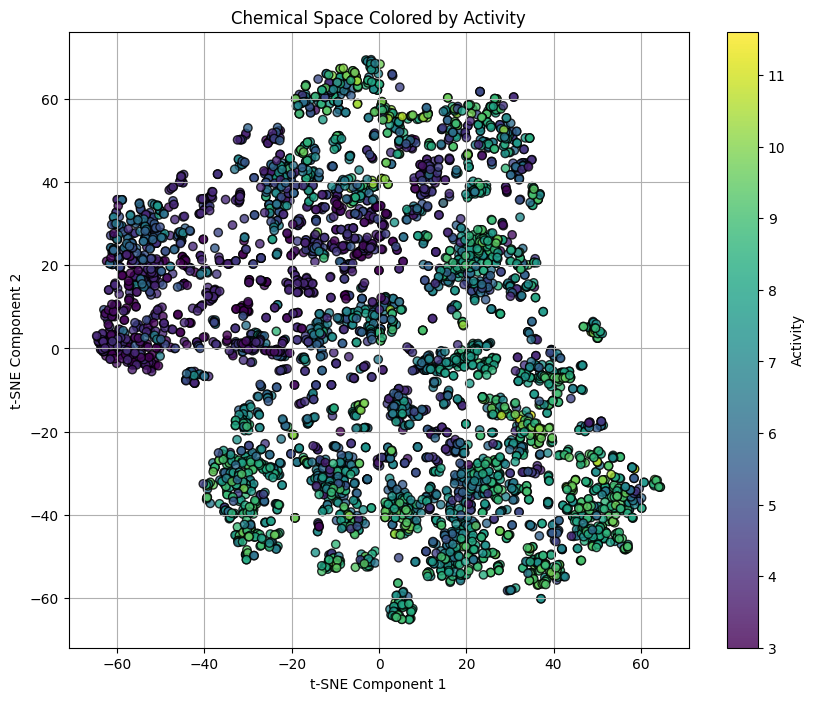

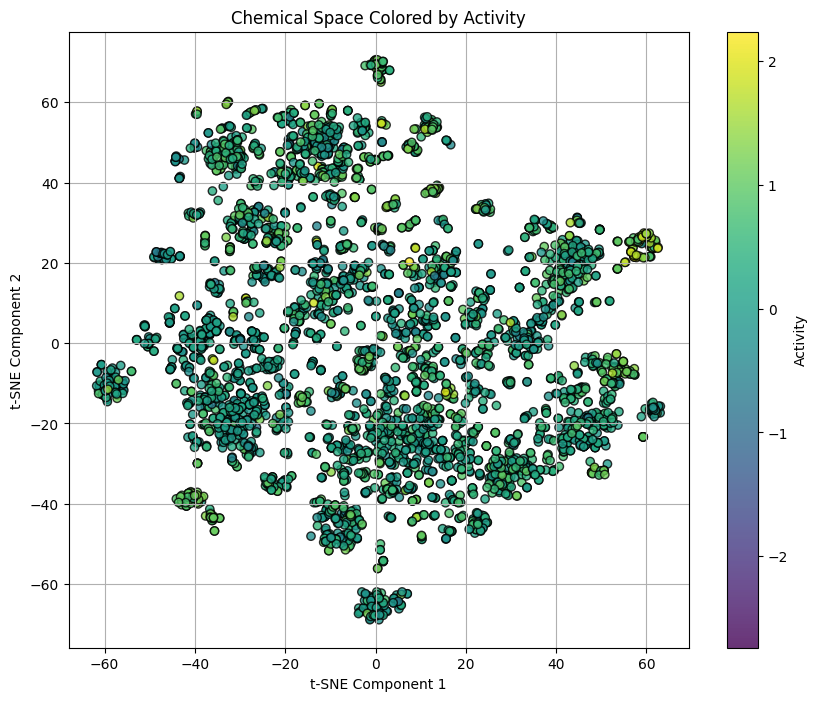

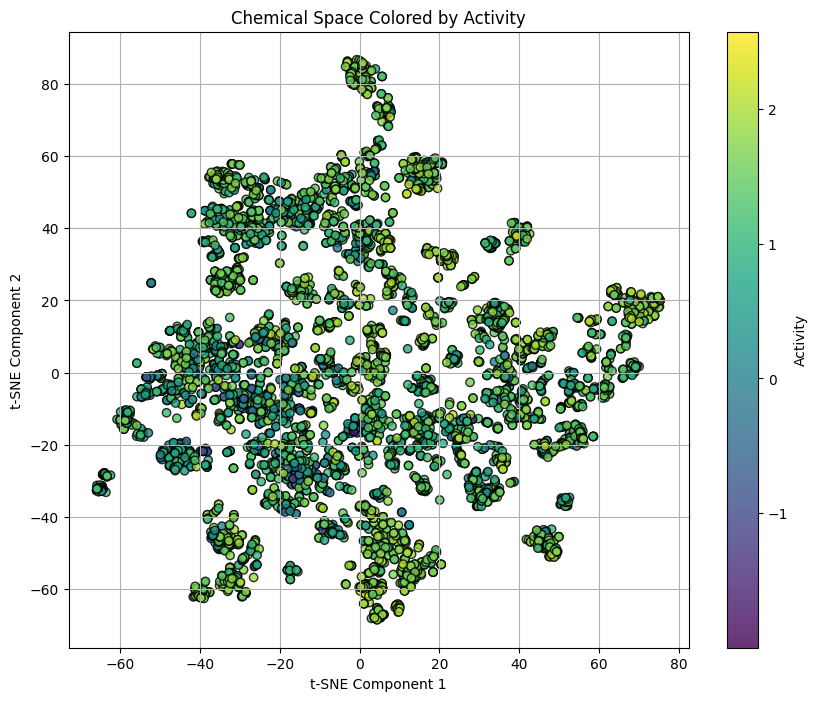

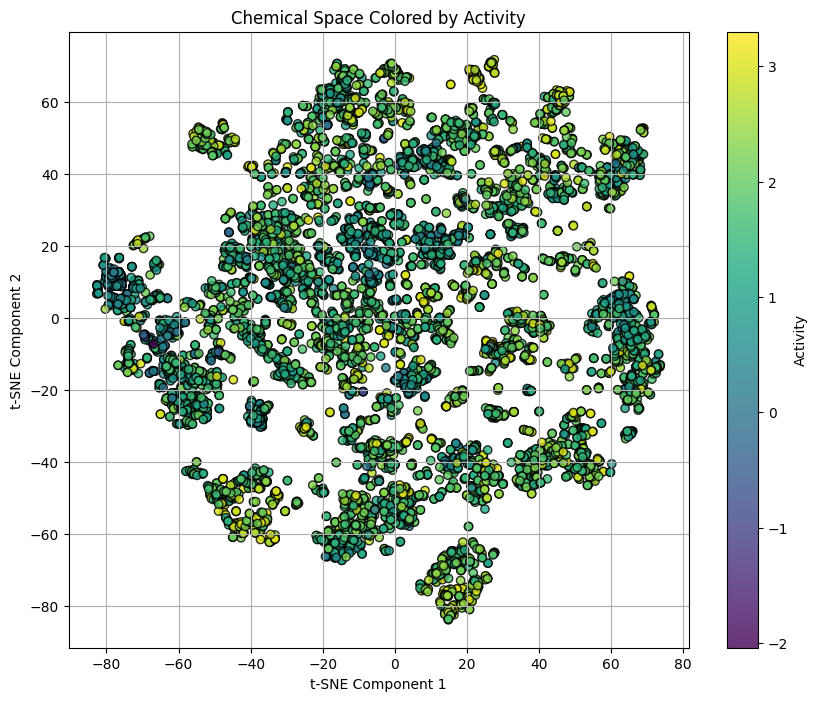

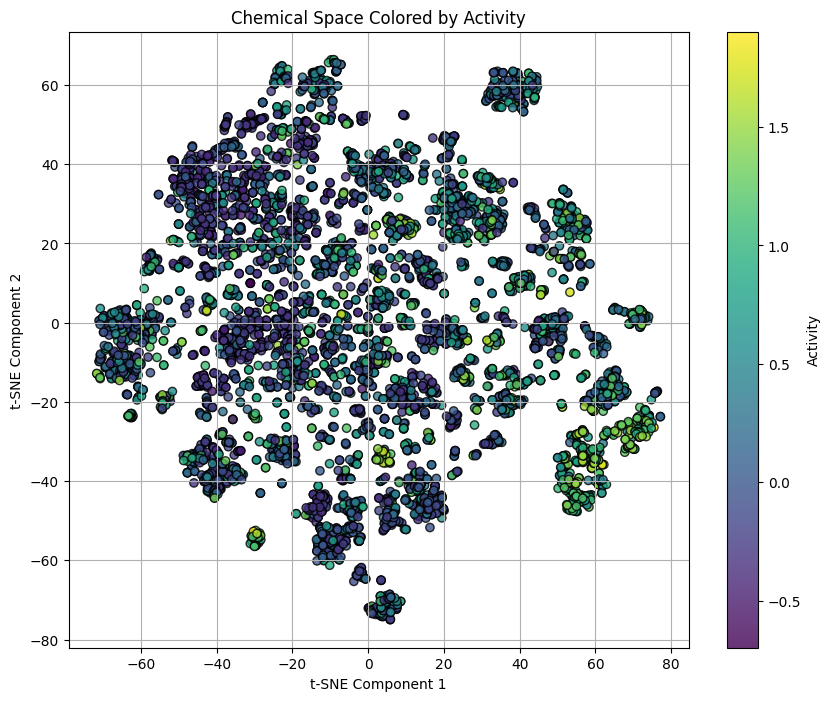

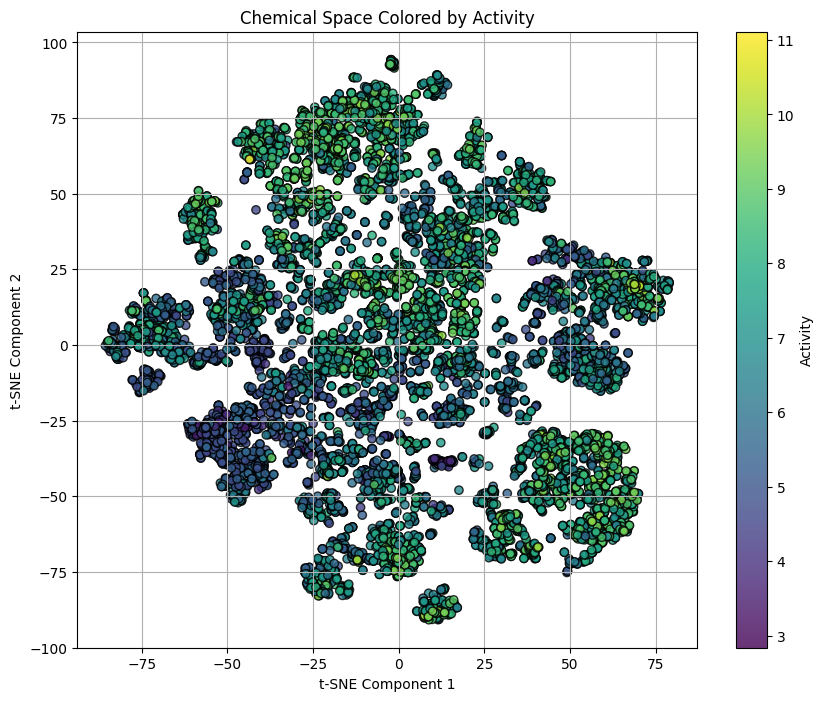

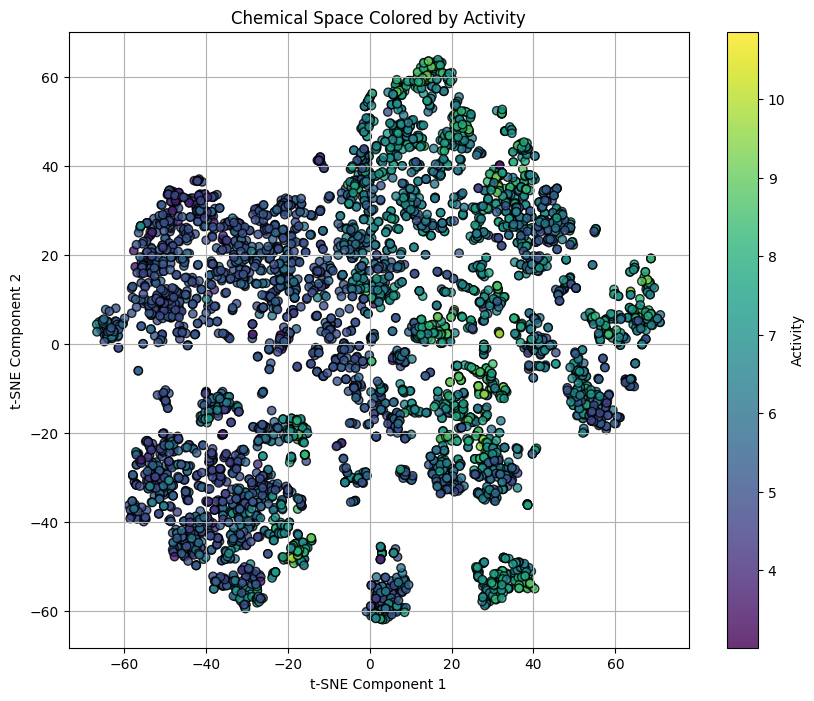

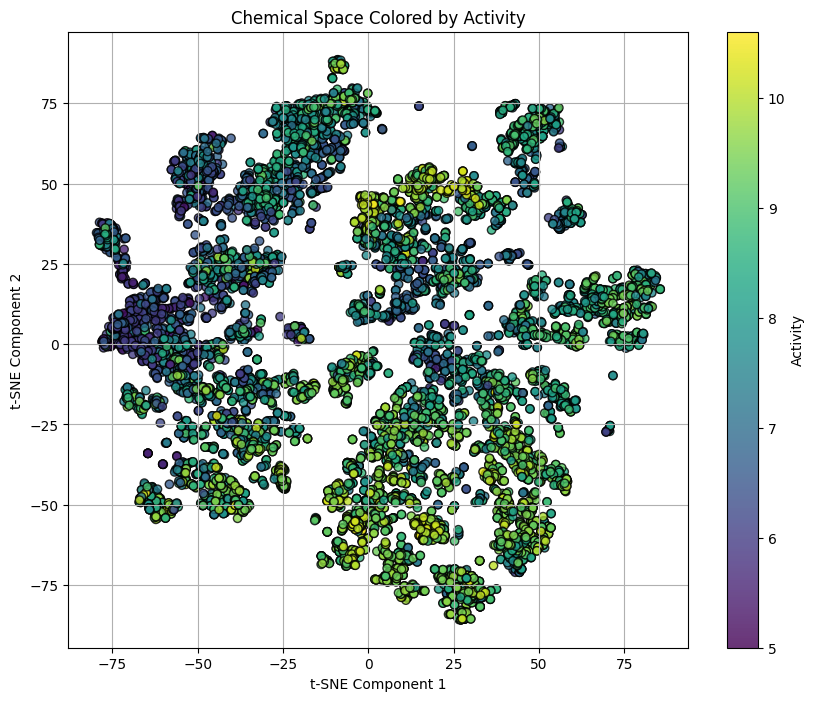

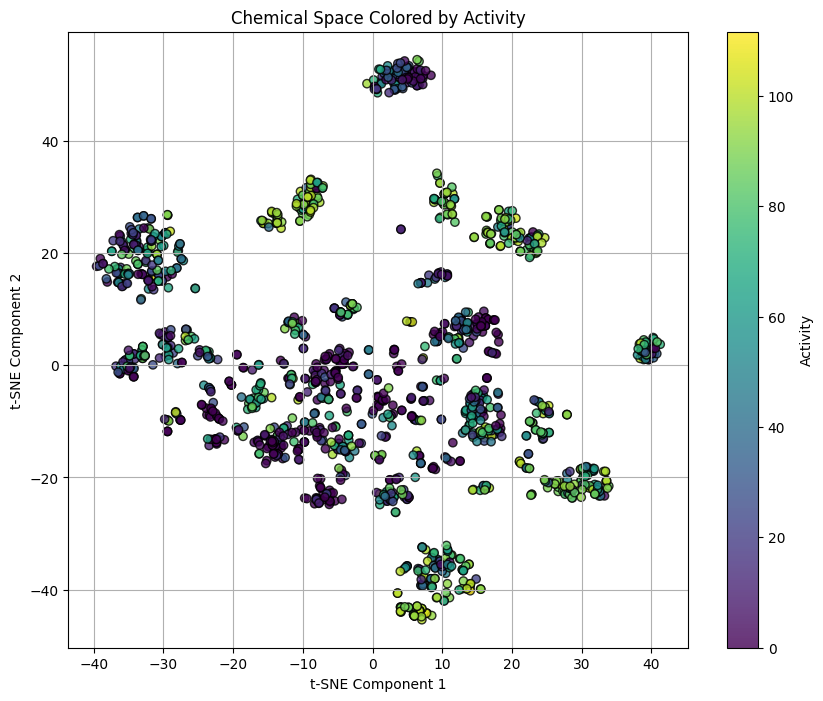

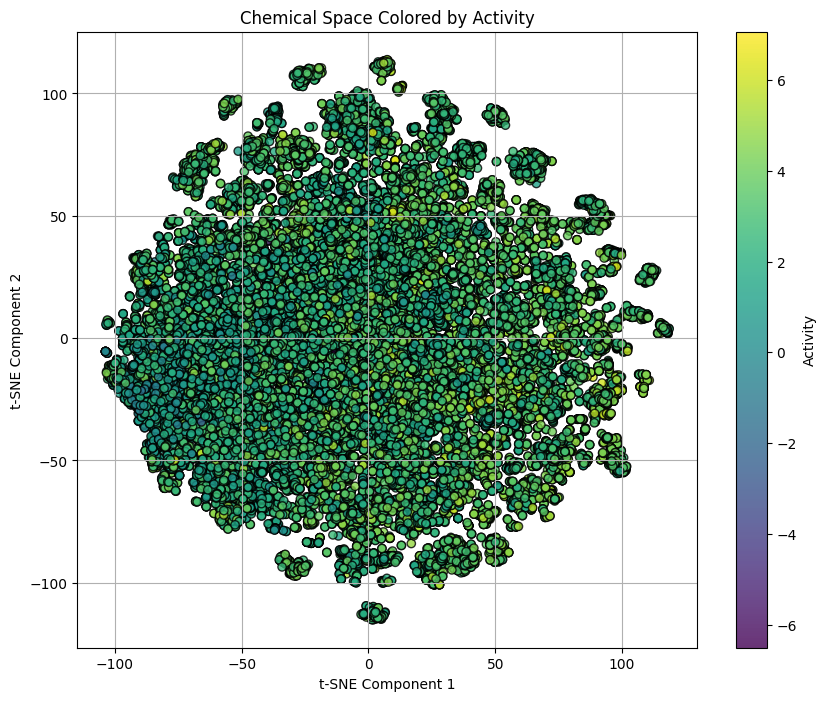

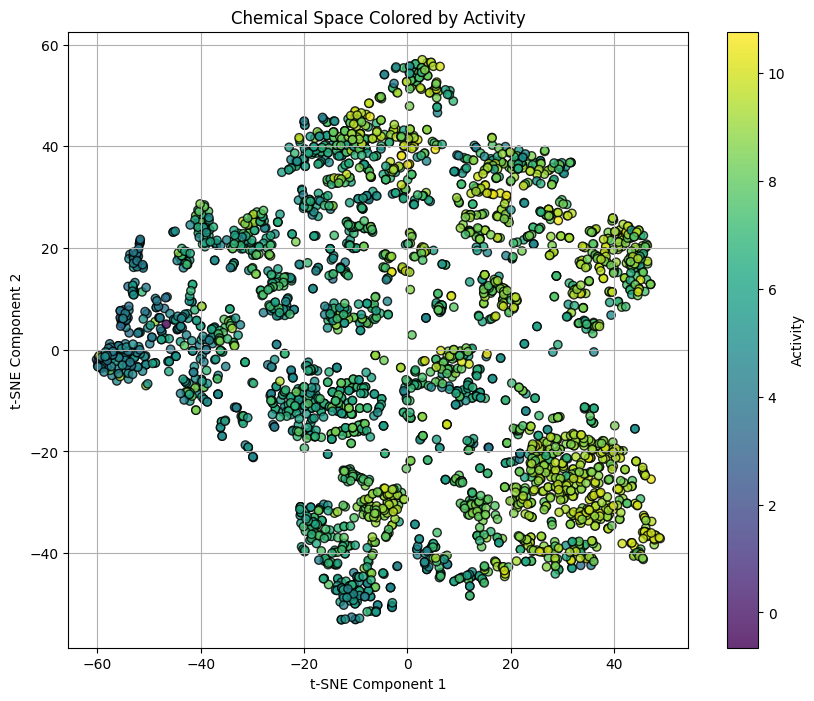

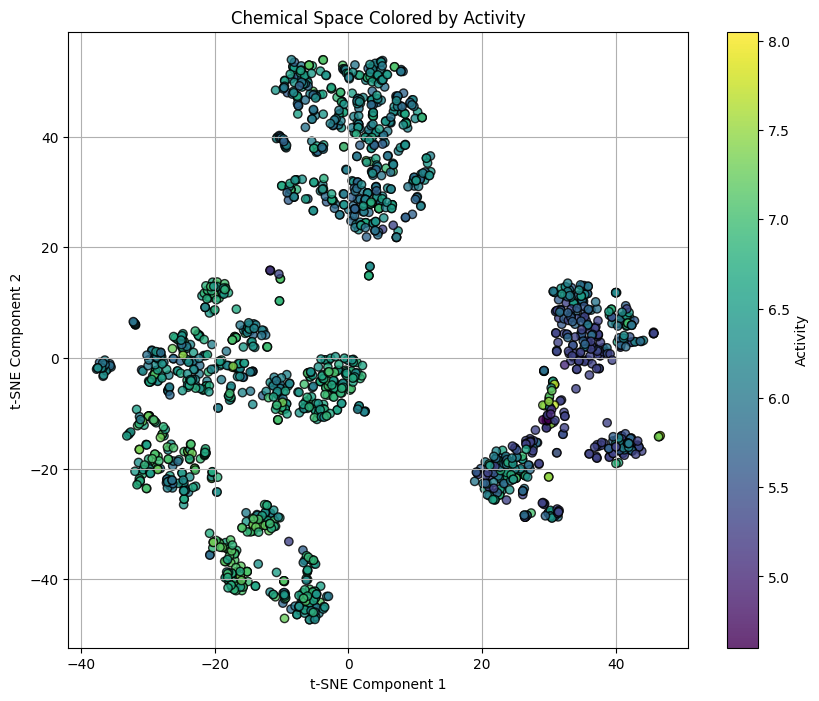

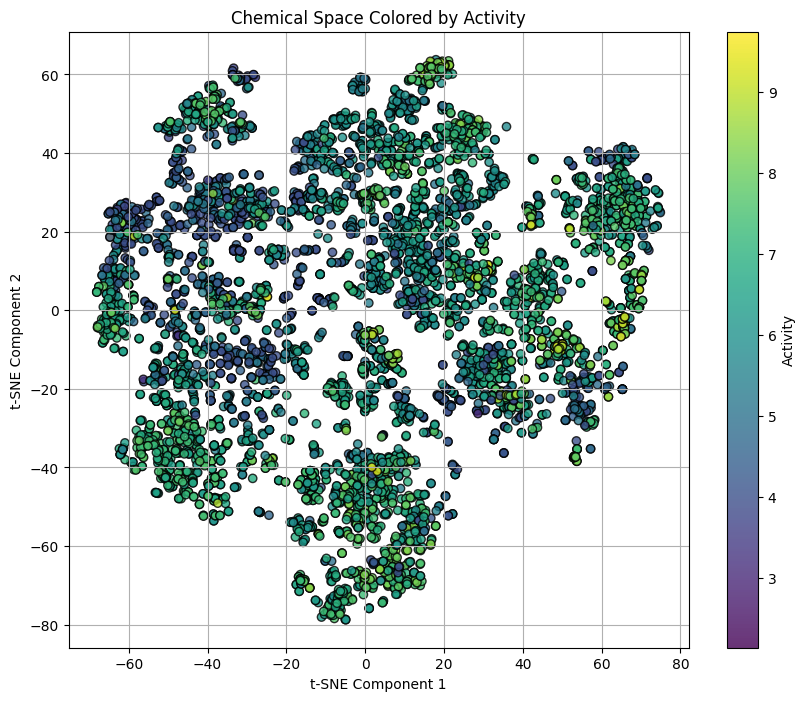

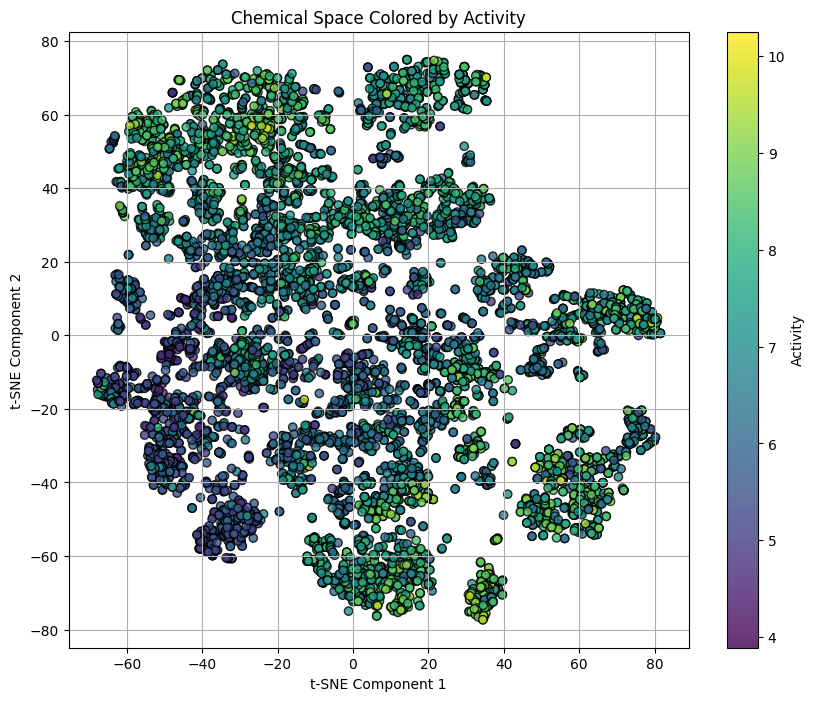

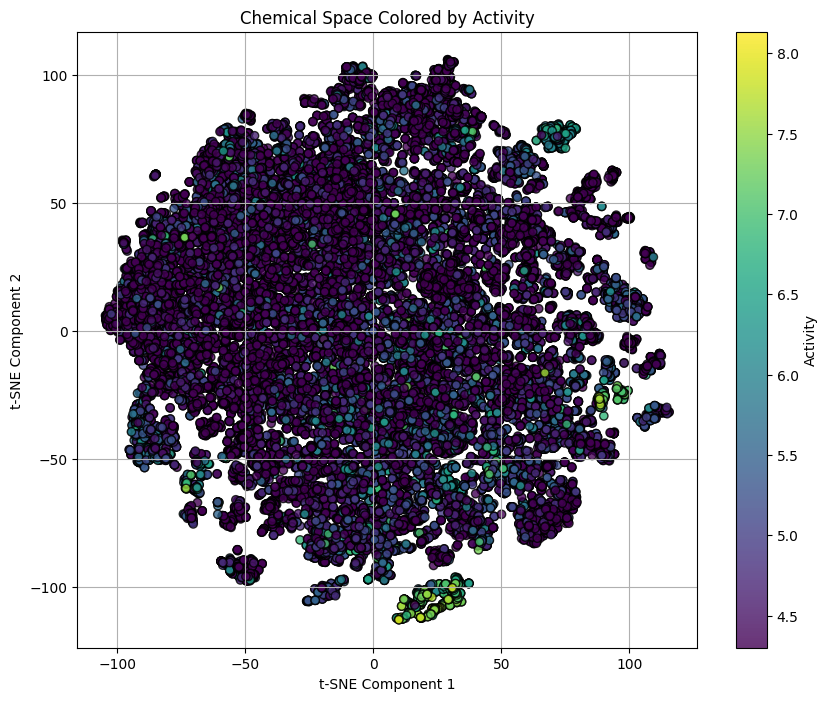

In [2]:
for i in range(1,16)[::-1]:
    print("################################################")
    print(i)
    datafile = pd.read_csv(f"TrainingSet/ACT{i}_competition_training.csv")
    print(datafile.shape)
    datafile.set_index("MOLECULE",inplace=True)
    #EDA
    print("Removing features with zero variance")
    datafile = datafile.loc[:, datafile.var() !=0] 
    print(datafile.shape)
    print("Removing feature with less then 0.1 correlation")
    cor = datafile.corr()["Act"]
    datafile = datafile[cor[cor>0.1].index]
    print(datafile.shape)
    datafile.to_csv(f"data/ACT{i}_clean.csv")
    
    print("Clustering with TSNE")
    tsne = TSNE(n_components=2, random_state=42, perplexity=50) #https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html
    embedding = tsne.fit_transform(datafile.iloc[:,1:])
    df = pd.DataFrame(embedding, columns=["X", "Y"])
    df["Act"] = datafile.Act.values
    property_values = df["Act"]
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df["X"], df["Y"], c=property_values, cmap='viridis', edgecolors='k', alpha=0.8)
    plt.colorbar(scatter, label='Activity')
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.title("Chemical Space Colored by Activity")
    plt.grid(True)
    plt.savefig(f"data/ACT{i}_TSNE.jpg")

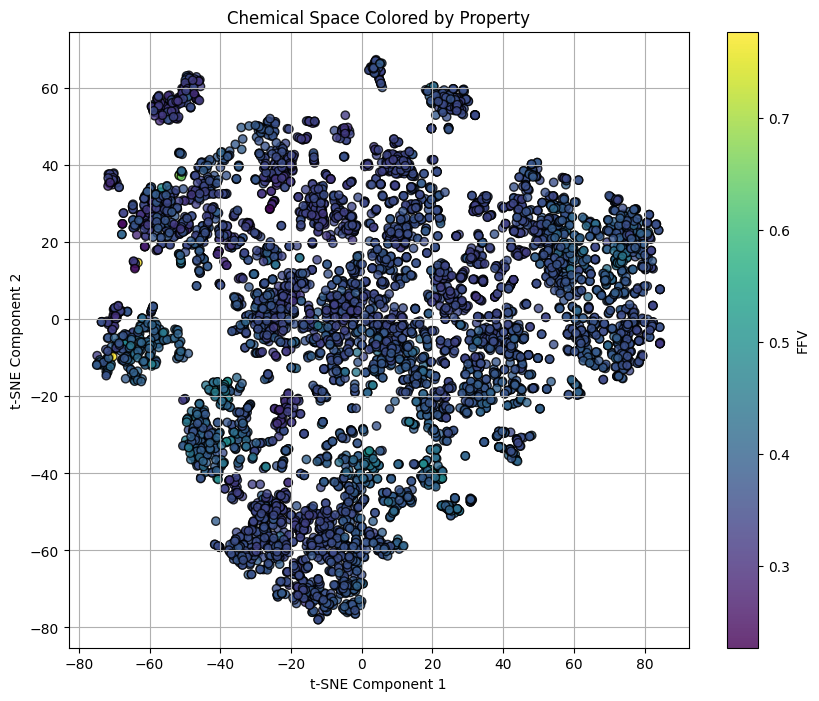

In [96]:
#FFV
df = pd.DataFrame(embedding, columns=["X", "Y"])
df =pd.concat([df,data_raw[["id","FFV"]]],axis=1)
df.dropna(inplace=True)
property_values = df['FFV']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df["X"], df["Y"], c=property_values, cmap='viridis', edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label='FFV')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Chemical Space Colored by Property")
plt.grid(True)
plt.show()

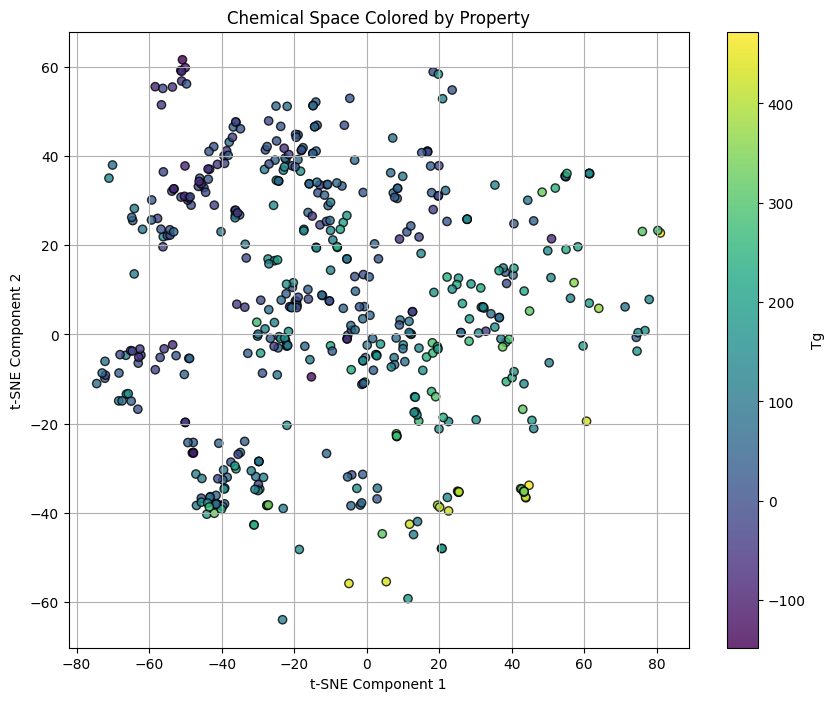

In [97]:
#Tg
df = pd.DataFrame(embedding, columns=["X", "Y"])
df =pd.concat([df,data_raw[["id","Tg"]]],axis=1)
df.dropna(inplace=True)
property_values = df['Tg']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df["X"], df["Y"], c=property_values, cmap='viridis', edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label='Tg')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Chemical Space Colored by Property")
plt.grid(True)
plt.show()

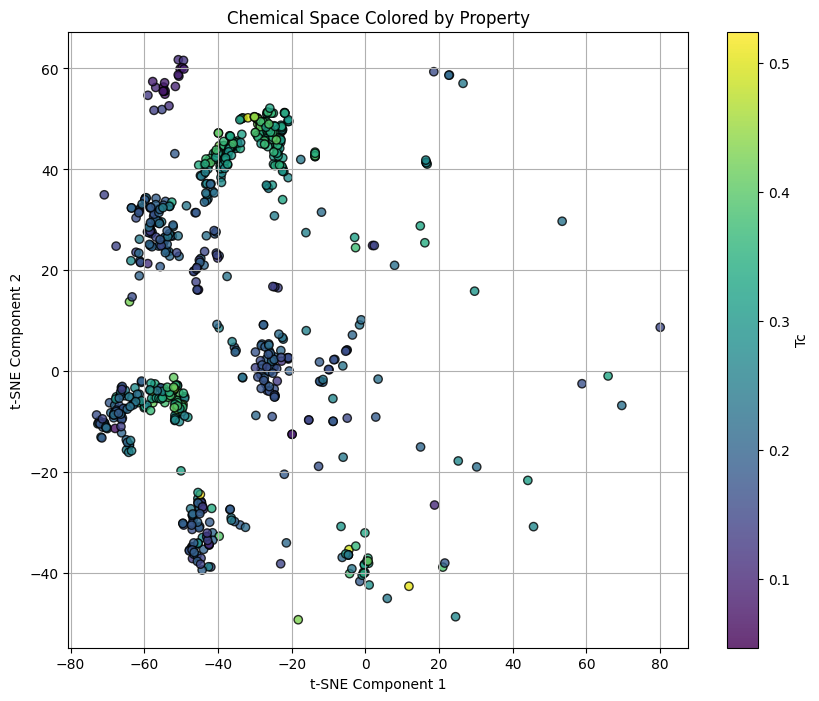

In [98]:
#Tc
df = pd.DataFrame(embedding, columns=["X", "Y"])
df =pd.concat([df,data_raw[["id","Tc"]]],axis=1)
df.dropna(inplace=True)
property_values = df['Tc']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df["X"], df["Y"], c=property_values, cmap='viridis', edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label='Tc')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Chemical Space Colored by Property")
plt.grid(True)
plt.show()

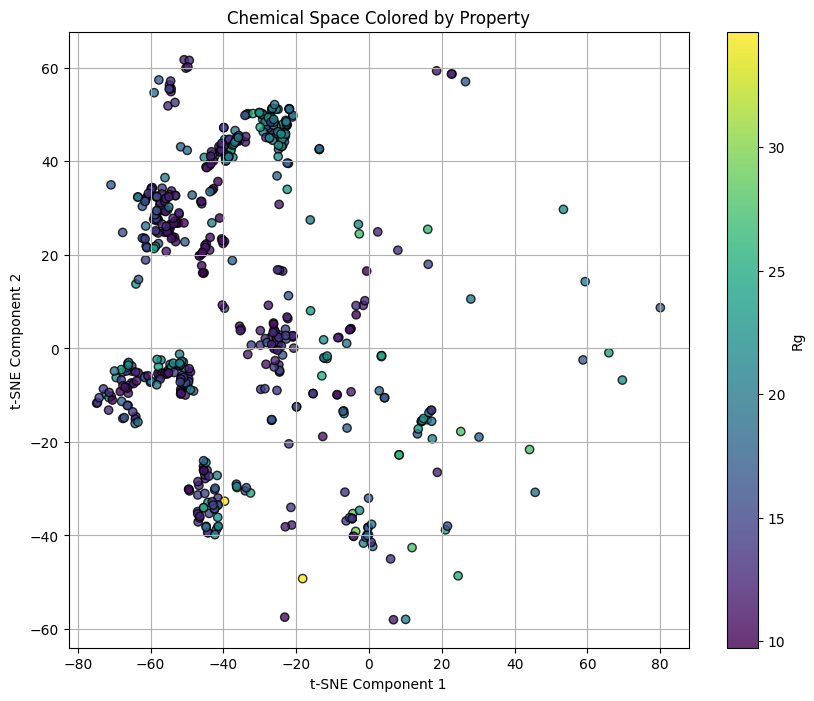

In [99]:
#Rg
df = pd.DataFrame(embedding, columns=["X", "Y"])
df =pd.concat([df,data_raw[["id","Rg"]]],axis=1)
df.dropna(inplace=True)
property_values = df['Rg']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df["X"], df["Y"], c=property_values, cmap='viridis', edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label='Rg')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Chemical Space Colored by Property")
plt.grid(True)
plt.show()

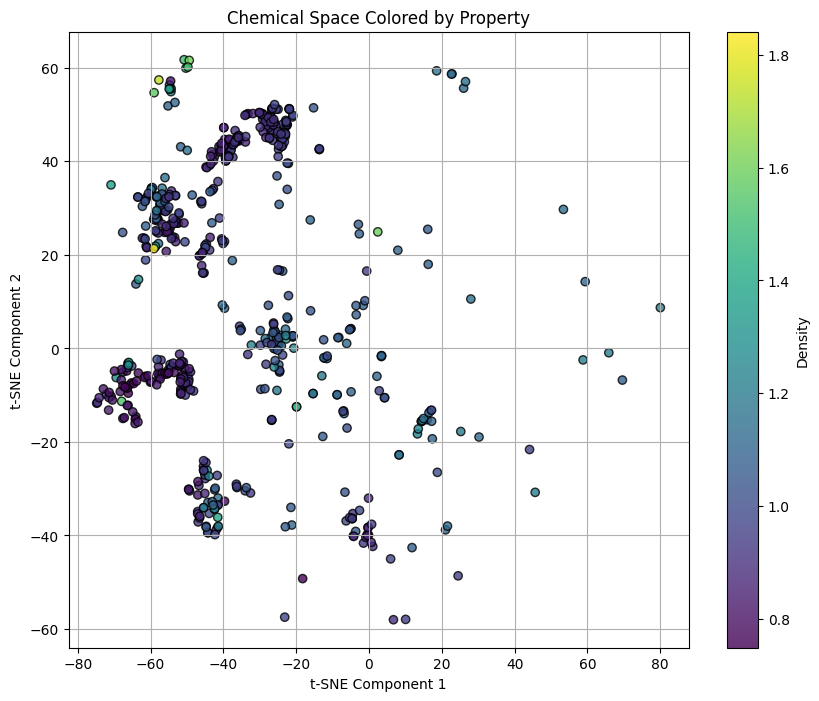

In [100]:
#Density
df = pd.DataFrame(embedding, columns=["X", "Y"])
df =pd.concat([df,data_raw[["id","Density"]]],axis=1)
df.dropna(inplace=True)
property_values = df['Density']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df["X"], df["Y"], c=property_values, cmap='viridis', edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label='Density')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Chemical Space Colored by Property")
plt.grid(True)
plt.show()